In [11]:
# set up
import warnings; warnings.simplefilter('ignore')

In [15]:
pip install gdown --quiet

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import gdown

In [19]:
# Convert Google Sheets link to a direct download link
google_sheets_url = 'https://docs.google.com/spreadsheets/d/1bOcne9XcuJ8THqSqscsVLCRb8zSSmaqU/edit?usp=sharing&ouid=118030956538548219282&rtpof=true&sd=true'
file_id = google_sheets_url.split('/d/')[1].split('/')[0]
download_url = f'https://drive.google.com/uc?id={file_id}'

In [21]:
# Download the file using gdown
gdown.download(download_url, 'dataset.xlsx', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bOcne9XcuJ8THqSqscsVLCRb8zSSmaqU
To: C:\Users\srous\OneDrive - aueb.gr\ΕΞΑΜΗΝΟ 7\ΝΟΜΙΣΜΑΤΙΚΗ ΘΕΩΡΙΑ\Workshop\Revised Presentation\Data to Send\dataset.xlsx
100%|██████████████████████████████████████████████████████████████████████████████| 90.5k/90.5k [00:00<00:00, 986kB/s]


'dataset.xlsx'

In [23]:
# Read the downloaded file as an Excel file
df = pd.read_excel('dataset.xlsx', engine='openpyxl')
df

,year,gdp_France,consumption_France,investment_France,imports_France,exports_France,government_expenditure_France,gdp_Germany,consumption_Germany,investment_Germany,...,investment_Portugal,imports_Portugal,exports_Portugal,government_expenditure_Portugal,gdp_Spain,consumption_Spain,investment_Spain,imports_Spain,exports_Spain,government_expenditure_Spain
0,1870,9.581409,14.110000,0.101854,0.463463,0.452956,0.512444,11.063086,9.480000,0.123486,...,NaN,566.635135,453.308108,702.627568,6.603847,9.368696,0.047005,1330.654199,1258.438844,2847.558646
1,1871,10.021148,13.040000,0.091523,0.552342,0.444878,0.472286,11.121133,9.810000,0.105616,...,NaN,628.965000,489.195000,489.195000,7.111882,10.073289,0.050675,1557.008355,1644.277116,2519.076752
2,1872,10.549079,14.360000,0.120853,0.558688,0.588735,0.425667,11.309271,10.530000,0.156372,...,NaN,675.555000,535.785000,559.080000,8.199589,11.717701,0.049487,1878.869732,1794.368226,2497.802736
3,1873,10.401316,13.870000,0.111879,0.556340,0.592647,0.449141,11.494527,10.880000,0.132033,...,NaN,600.275368,423.723789,406.068632,8.861054,12.347453,0.040749,1471.692097,1960.371495,2511.437177
4,1874,10.831414,13.880000,0.132677,0.548985,0.579189,0.435057,11.608357,11.230000,0.172431,...,NaN,602.086154,494.570769,580.583077,8.089783,11.230147,0.046999,1834.328279,1724.447174,2284.390036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2016,104.949475,104.145524,0.219570,22.318518,19.507623,23.056582,118.044398,109.727649,0.202983,...,0.154933,66352.241777,68301.220141,45869.940732,101.574803,93.194252,0.179602,270761.170523,306879.737263,179006.267815
147,2017,107.043215,105.379228,0.224798,23.676239,20.327796,23.501277,120.756121,110.865695,0.204115,...,0.167840,73308.507511,75082.384160,45204.044749,104.429134,95.787473,0.186710,292313.583630,325734.045002,174071.782324
148,2018,108.740791,106.122576,0.228926,24.260434,20.733742,22.950227,121.701267,112.118289,0.210572,...,0.175225,78185.301452,79026.901968,45720.306654,106.594488,96.985131,0.194469,306257.785534,331904.258886,179719.860473
149,2019,110.502781,107.763454,0.234774,24.533618,21.189726,23.180149,122.708789,113.617276,0.213689,...,0.181062,81581.950469,82438.627605,47620.672143,107.972441,97.242747,0.200813,310443.133926,338846.039428,181426.480203


In [19]:
df.loc[45:53,['year','investment_France']]

,year,investment_France
45,1915,0.190089
46,1916,0.161728
47,1917,0.228515
48,1918,0.220767
49,1919,NaN
50,1920,0.210000
51,1921,0.181000
52,1922,0.182000
53,1923,0.170000


In [33]:
# Interpolate only between gaps
def interpolate_between_gaps(df):
    df_interpolated = df.copy()  # Make a copy to avoid modifying the original data
    
    # Iterate through each column in the dataframe
    for column in df.columns:
        # Find the first valid year (index with data)
        start_year = df[column].first_valid_index()

        if pd.notna(start_year):  # Ensure there is valid data
            # Interpolate only between gaps after the first valid value
            before_start = df[column].iloc[:start_year]  # Data before the first valid index
            after_start = df[column].iloc[start_year:].interpolate(method='linear', limit_direction='both')  # Interpolate after the first valid value
            
            # Concatenate the before and after parts using pd.concat
            df_interpolated[column] = pd.concat([before_start, after_start])
    
    return df_interpolated

# Apply the interpolation function
df_interpolated = interpolate_between_gaps(df)
df_interpolated.loc[45:53,['year','investment_France']]

,year,investment_France
45,1915,0.190089
46,1916,0.161728
47,1917,0.228515
48,1918,0.220767
49,1919,0.215384
50,1920,0.210000
51,1921,0.181000
52,1922,0.182000
53,1923,0.170000


In [35]:
# Apply log transformation after interpolation
df_log = np.log(df_interpolated)

C:\Users\srous\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [39]:
print("Year | France GDP  | France Log GDP ")  

for year, interpolation,log in zip(df['year'], df_interpolated['gdp_France'], df_log['gdp_France']):
    print(f"{year} | {interpolation} | {log}")

Year | France GDP  | France Log GDP 
1870 | 9.58140897020669 | 2.259824655302739
1871 | 10.0211484610277 | 2.3046977059577394
1872 | 10.5490794167746 | 2.3560385970412834
1873 | 10.4013155814098 | 2.3419322963595834
1874 | 10.8314138879179 | 2.3824506053926173
1875 | 10.6067235503509 | 2.3614880972394916
1876 | 10.471341025367 | 2.3486420993326163
1877 | 10.4238455068569 | 2.344096018804895
1878 | 9.8359362360685 | 2.286042641623346
1879 | 9.73201441778999 | 2.2754209064029154
1880 | 10.314341950292 | 2.3335353490729807
1881 | 10.9719722065856 | 2.395344039950165
1882 | 11.3409758503948 | 2.42842234842389
1883 | 10.8443026290521 | 2.3836398387582713
1884 | 10.2730370869723 | 2.3295227043680073
1885 | 9.9672593150259 | 2.2993056530067513
1886 | 9.83624069452049 | 2.286073594827263
1887 | 9.9140805720787 | 2.2939560266662955
1888 | 10.1423229249189 | 2.316717057224729
1889 | 10.1705360748031 | 2.3194949200580077
1890 | 10.5417724139269 | 2.355345689689915
1891 | 10.6540160965597 | 2.3659

In [41]:
# Initialize dictionaries to store trend and cycle components
trend_data = {'year': df['year']}
cycle_data = {'year': df['year']}

# Apply the HP filter to each column and store results
for column in df_log.columns:
    
    data = df_log[column]
   
    # Find the first valid year where data is available
    start_year = data.first_valid_index()  # Get the index of the first valid value
    
    # If there is data available (valid start year), apply HP filter from that point onwards
    if pd.notna(start_year):  # Ensure there is data
        # Slice the data to only include values from the first valid year onward
        data_to_filter = data[start_year:]
        
        # Apply the HP filter
        cycle, trend = hpfilter(data_to_filter, lamb=100)
        
        # Create NaN values for years before the valid start year
        trend_series = pd.Series([float('nan')] * start_year, index=df.index[:start_year])
        cycle_series = pd.Series([float('nan')] * start_year, index=df.index[:start_year])
        
        # Concatenate the NaNs with the trend and cycle results
        trend_series = pd.concat([trend_series, pd.Series(trend, index=data_to_filter.index)])
        cycle_series = pd.concat([cycle_series, pd.Series(cycle, index=data_to_filter.index)])
        
        # Store the trend and cycle components in the dictionaries
        trend_data[column] = trend_series
        cycle_data[column] = cycle_series
    else:
        # If there's no valid data for the country, return NaNs
        trend_data[column] = pd.Series([float('nan')] * len(df), index=df.index)
        cycle_data[column] = pd.Series([float('nan')] * len(df), index=df.index)

        
# Create DataFrames from the trend and cycle dictionaries
df_trend = pd.DataFrame(trend_data)  # DataFrame for trends
df_cycle = pd.DataFrame(cycle_data)  # DataFrame for cycles


# Reset the index for trends and cycles 
df.reset_index(inplace=True)
df_log.reset_index(inplace=True)
df_trend.reset_index(inplace=True)
df_cycle.reset_index(inplace=True)

C:\Users\srous\AppData\Local\Temp\ipykernel_26684\2074732787.py:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  trend_series = pd.concat([trend_series, pd.Series(trend, index=data_to_filter.index)])
C:\Users\srous\AppData\Local\Temp\ipykernel_26684\2074732787.py:27: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cycle_series = pd.concat([cycle_series, pd.Series(cycle, index=data_to_filter.index)])


In [43]:
print("France")
print("Year | Log | Trend | Cycle")  

for year, log, trend, cycle in zip(df['year'], df_log['gdp_France'], df_trend['gdp_France'], df_cycle['gdp_France']):
    print(f"{year} | {log} | {trend} | {cycle}")

France
Year | Log | Trend | Cycle
1870 | 2.259824655302739 | 2.310185724660561 | -0.05036106935782225
1871 | 2.3046977059577394 | 2.3179631041302553 | -0.01326539817251593
1872 | 2.3560385970412834 | 2.3252368729063715 | 0.03080172413491189
1873 | 2.3419322963595834 | 2.3313707663136056 | 0.010561530045977818
1874 | 2.3824506053926173 | 2.336036536918004 | 0.04641406847461349
1875 | 2.3614880972394916 | 2.339011552586072 | 0.022476544653419417
1876 | 2.3486420993326163 | 2.3405373218690615 | 0.008104777463554758
1877 | 2.344096018804895 | 2.3410801187647587 | 0.003015900040136188
1878 | 2.286042641623346 | 2.3411872650455856 | -0.05514462342223947
1879 | 2.2754209064029154 | 2.3414362414843652 | -0.06601533508144986
1880 | 2.3335353490729807 | 2.341853082619698 | -0.008317733546717498
1881 | 2.395344039950165 | 2.3418036696393685 | 0.053540370310796614
1882 | 2.42842234842389 | 2.3405707063956953 | 0.08785164202819473
1883 | 2.3836398387582713 | 2.3379723004441058 | 0.04566753831416559

C:\Users\srous\AppData\Local\Temp\ipykernel_26684\2440180405.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


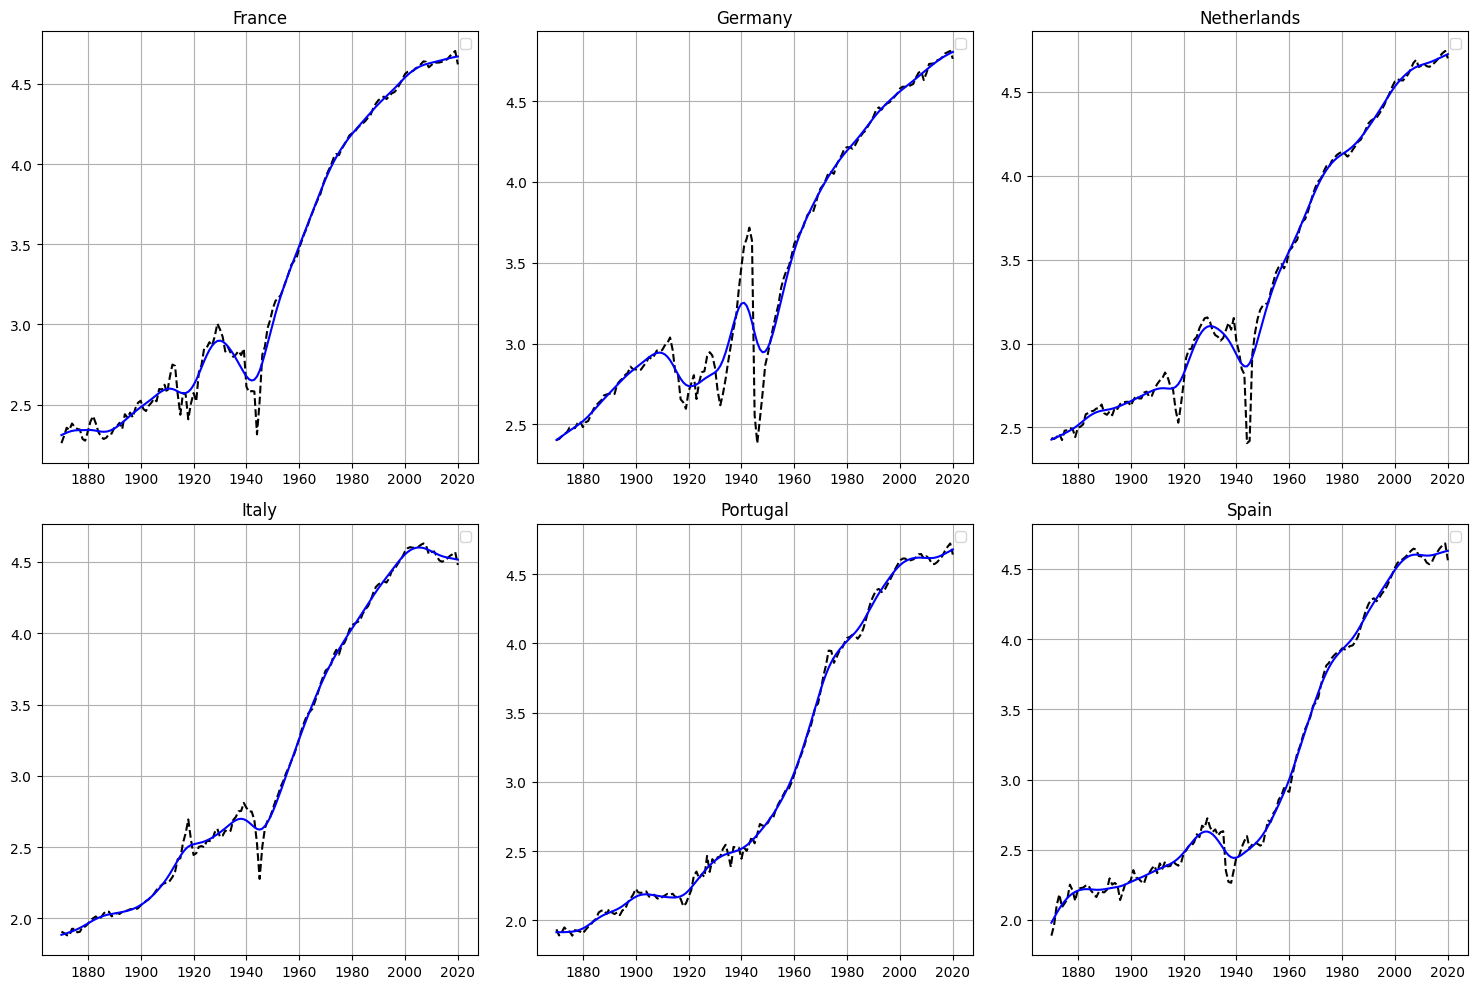

In [45]:
# Define GDP columns for the six countries
gdp_columns = [
    "gdp_France", "gdp_Germany", "gdp_Netherlands",
    "gdp_Italy", "gdp_Portugal", "gdp_Spain"
]

# Create the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 3 rows, 2 columns

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each country's GDP log and trend
for i, col in enumerate(gdp_columns):
    # Plot log-transformed GDP (original) as dotted line
    axes[i].plot(df['year'], df_log[col], linestyle='--', color='black')
    # Plot GDP trend as a solid line
    axes[i].plot(df['year'], df_trend[col],color='blue')
    
    # Customize subplot
    axes[i].set_title(f"{col.split('_')[1]}")
    axes[i].legend()
    axes[i].grid()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

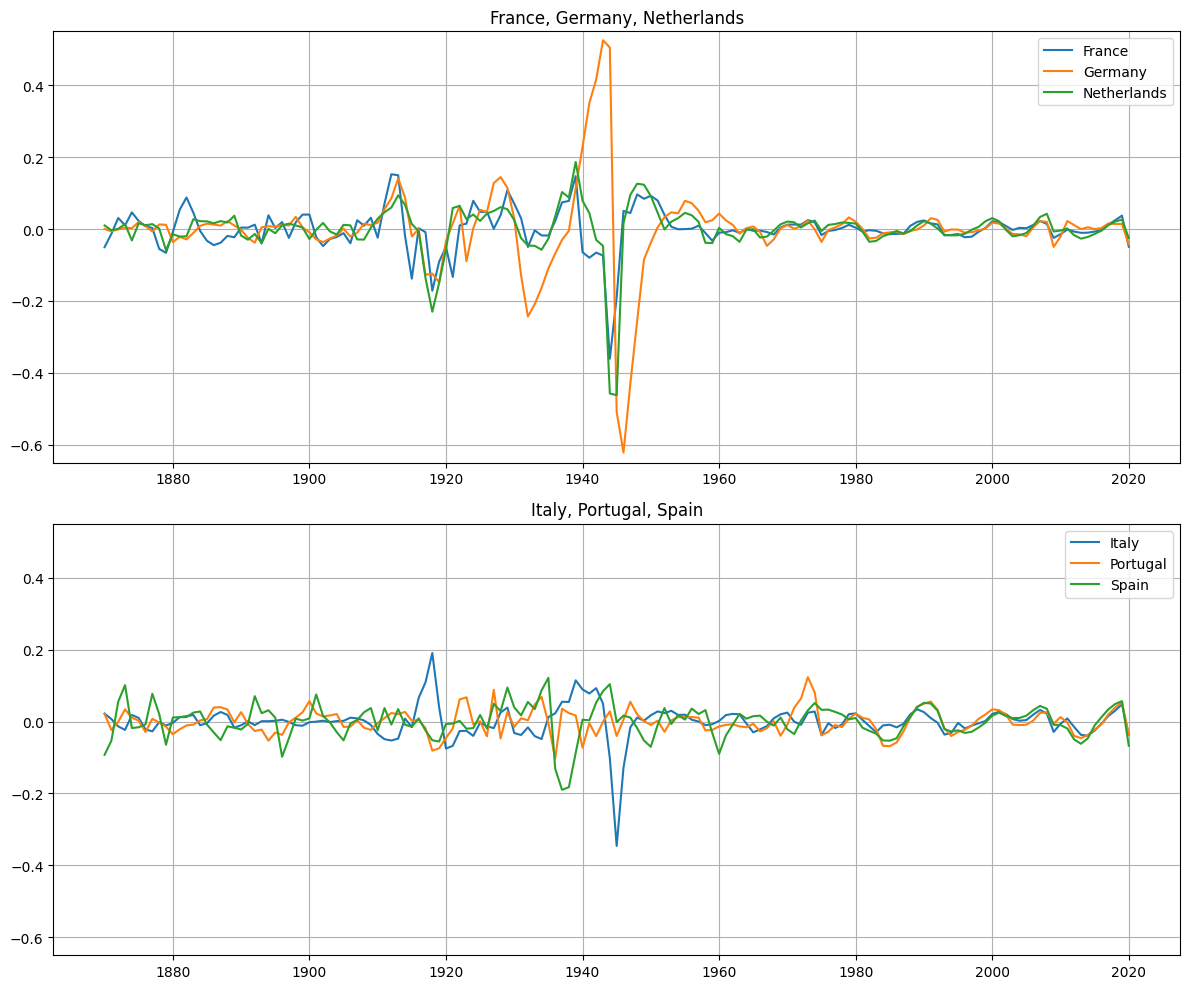

In [29]:
# Define GDP columns for the two groups of countries
gdp_columns_group1 = ["gdp_France", "gdp_Germany", "gdp_Netherlands"]
gdp_columns_group2 = ["gdp_Italy", "gdp_Portugal", "gdp_Spain"]

# Set common y-axis limits
y_limits = (-0.65, 0.55)

# Create the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column

# Plot cycles for the first group of countries
for col in gdp_columns_group1:
    axes[0].plot(df['year'], df_cycle[col], label=f"{col.split('_')[1]}")
axes[0].set_title("France, Germany, Netherlands")

axes[0].legend()
axes[0].grid()
axes[0].set_ylim(y_limits)

# Plot cycles for the second group of countries
for col in gdp_columns_group2:
    axes[1].plot(df['year'], df_cycle[col], label=f"{col.split('_')[1]}")
axes[1].set_title("Italy, Portugal, Spain")

axes[1].legend()
axes[1].grid()
axes[1].set_ylim(y_limits)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [47]:
# Full list of columns to process
columns_to_filter = [
    'gdp_France', 'consumption_France', 'investment_France', 'imports_France', 'exports_France',
    'government_expenditure_France', 'gdp_Germany', 'consumption_Germany', 'investment_Germany',
    'imports_Germany', 'exports_Germany', 'government_expenditure_Germany', 'gdp_Netherlands',
    'consumption_Netherlands', 'investment_Netherlands', 'imports_Netherlands', 'exports_Netherlands',
    'government_expenditure_Netherlands', 'gdp_Italy', 'consumption_Italy', 'investment_Italy',
    'imports_Italy', 'exports_Italy', 'government_expenditure_Italy', 'gdp_Portugal', 
    'consumption_Portugal', 'investment_Portugal', 'imports_Portugal', 'exports_Portugal',
    'government_expenditure_Portugal', 'gdp_Spain', 'consumption_Spain', 'investment_Spain',
    'imports_Spain', 'exports_Spain', 'government_expenditure_Spain'
]

# Full list of countries and categories
countries = ['France', 'Germany', 'Netherlands', 'Italy', 'Portugal', 'Spain']
categories = ['gdp', 'consumption', 'investment', 'imports', 'exports', 'government_expenditure']

# Create a DataFrame to store the results (6x6: countries x categories)
volatility_matrix = pd.DataFrame(index=countries, columns=categories)

# Calculate volatility for each country and category
for country in countries:
    for category in categories:
        # Construct column name patterns for the current country and category
        column_name = f"{category}_{country}"
        
        if column_name in df_cycle.columns:  # Ensure the column exists in the DataFrame
            # Calculate standard deviation of the cycle component
            volatility_matrix.loc[country, category] = df_cycle[column_name].std()

# Convert results to numeric format (in case of mixed types due to NaNs)
volatility_matrix = volatility_matrix.apply(pd.to_numeric)

In [49]:
volatility_matrix['gdp']

France         0.056676
Germany        0.120441
Netherlands    0.069942
Italy          0.045844
Portugal       0.033948
Spain          0.046301
Name: gdp, dtype: float64

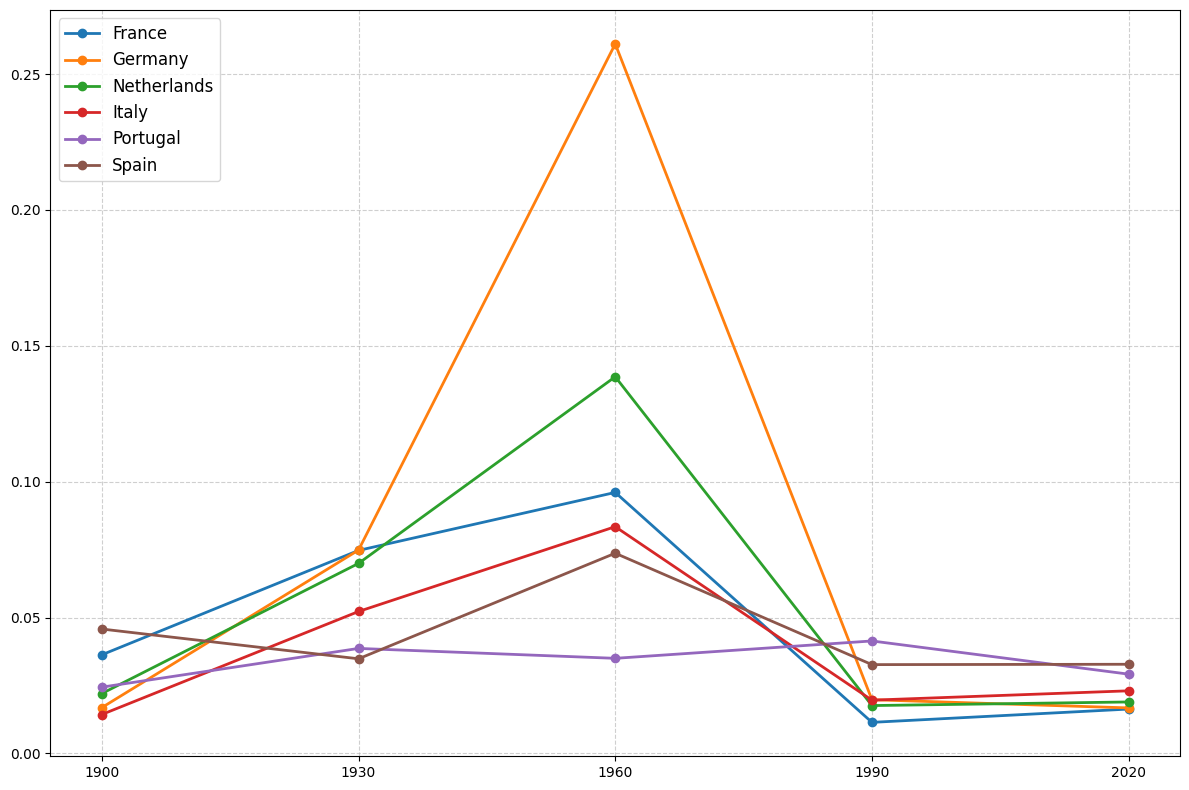

In [51]:
df_cycle['year'] = df['year']
time_periods = [
    (1870, 1900), (1900, 1930), (1930, 1960), (1960, 1990), (1990, 2020)
]

# Function to assign each year to its corresponding time period
def assign_time_period(year):
    for start, end in time_periods:
        if start <= year < end:
            return f"{start}-{end}"
    return None  # If the year doesn't fall into any period (e.g., 2020+)

# Apply the function to create a new column for time period labels
df_cycle['period'] = df_cycle['year'].apply(assign_time_period)

# Create a DataFrame to store decade-wise volatility for each country
gdp_volatility_decade = pd.DataFrame()

# List of GDP columns
gdp_columns = [
    "gdp_France", "gdp_Germany", "gdp_Netherlands",
    "gdp_Italy", "gdp_Portugal", "gdp_Spain"
]

# Calculate volatility per decade for each country
for col in gdp_columns:
    # Extract country name from the column name
    country = col.split("_")[1]
    
    # Group by decade and calculate standard deviation
    volatility_by_decade = df_cycle.groupby('period')[col].std()
    
    # Store the results
    gdp_volatility_decade[country] = volatility_by_decade

# Plotting all countries' volatility in the same figure
plt.figure(figsize=(12, 8))  # Set figure size

# Define the last years of each period (for x-axis)
last_years = [1900, 1930, 1960, 1990, 2020]

# Plot each country's volatility time series on the same graph
for country in gdp_volatility_decade.columns:
    plt.plot(
        last_years,  # Use the last years of each period as the x-axis
        gdp_volatility_decade[country],  # Volatility on y-axis
        label=country,  # Country name for legend
        linewidth=2,  # Line thickness for visibility
        marker='o'  # Add markers for clarity
    )

# Add grid, legend, and layout adjustments
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')

# Set x-ticks to show only the last year of each period
plt.xticks(last_years)  # Set the x-axis ticks to the last year of each period

# Display the plot
plt.tight_layout()
plt.show()

In [53]:
# Calculate relative volatility
relative_volatility = volatility_matrix.div(volatility_matrix['gdp'], axis=0)

# Drop the 'gdp' column itself (as it would always be 1)
relative_volatility = relative_volatility.drop(columns=['gdp'])
relative_volatility

,consumption,investment,imports,exports,government_expenditure
France,1.321463,2.409638,4.002844,3.775316,2.551331
Germany,0.475970,0.859426,1.135374,1.453898,0.950098
Netherlands,1.235555,1.050437,3.112977,2.896644,1.387543
Italy,0.760748,2.388299,4.466393,7.311165,3.355708
Portugal,1.237533,1.926943,3.266399,3.510366,2.702161
Spain,1.496798,2.441109,3.349207,2.560627,1.775240


In [55]:
df_cycle['year'] = df['year']
time_periods = [
    (1870, 1900), (1900, 1930), (1930, 1960), (1960, 1990), (1990, 2020)
]

# Function to assign each year to its corresponding time period
def assign_time_period(year):
    for start, end in time_periods:
        if start <= year < end:
            return f"{start}-{end}"
    return None  # If the year doesn't fall into any period (e.g., 2020+)

# Apply the function to create a new column for time period labels
df_cycle['period'] = df_cycle['year'].apply(assign_time_period)

# Create a DataFrame to store decade-wise volatility for each country
relative_volatility_decade = pd.DataFrame()

gdp_columns = [
    "gdp_France", "gdp_Germany", "gdp_Netherlands",
    "gdp_Italy", "gdp_Portugal", "gdp_Spain"
]

# List of GDP columns
consumption_columns = [
    "consumption_France", "consumption_Germany", "consumption_Netherlands",
    "consumption_Italy", "consumption_Portugal", "consumption_Spain"
]

# Create a DataFrame to store relative volatility for each country
relative_volatility_decade = pd.DataFrame()

# Define the last years of each period (for x-axis)
last_years = [1900, 1930, 1960, 1990, 2020]

# Calculate relative volatility (consumption volatility / GDP volatility)
for gdp_col, consumption_col in zip(gdp_columns, consumption_columns):
    # Extract country name from the column name
    country = gdp_col.split("_")[1]
    
    # Calculate volatility for GDP and consumption by period
    gdp_volatility = df_cycle.groupby('period')[gdp_col].std()
    consumption_volatility = df_cycle.groupby('period')[consumption_col].std()
    
    # Calculate relative volatility
    relative_volatility_decade[country] = consumption_volatility / gdp_volatility

relative_volatility_decade
    

,France,Germany,Netherlands,Italy,Portugal,Spain
period,,,,,,
1870-1900,1.008788,1.510594,1.427889,1.154863,NaN,1.276471
1900-1930,0.779652,1.219605,1.352340,0.346162,1.618510,1.707466
1930-1960,1.605419,0.327713,1.200641,0.814349,0.990521,1.683333
1960-1990,1.224132,1.077435,1.306942,0.996058,1.014725,0.968815
1990-2020,0.903653,0.699474,1.032075,1.046335,1.139089,1.062606


In [57]:
df_cycle['year'] = df['year']
time_periods = [
     (2000, 2020)
]

# Function to assign each year to its corresponding time period
def assign_time_period(year):
    for start, end in time_periods:
        if start <= year < end:
            return f"{start}-{end}"
    return None  # If the year doesn't fall into any period 

# Apply the function to create a new column for time period labels
df_cycle['period'] = df_cycle['year'].apply(assign_time_period)

# Create a DataFrame to store decade-wise volatility for each country
relative_volatility_decade = pd.DataFrame()

gdp_columns = [
    "gdp_France", "gdp_Germany", "gdp_Netherlands",
    "gdp_Italy", "gdp_Portugal", "gdp_Spain"
]

# List of GDP columns
consumption_columns = [
    "consumption_France", "consumption_Germany", "consumption_Netherlands",
    "consumption_Italy", "consumption_Portugal", "consumption_Spain"
]

# List of GDP columns
investment_columns = [
    "investment_France", "investment_Germany", "investment_Netherlands",
    "investment_Italy", "investment_Portugal", "investment_Spain"
]

# Create a DataFrame to store relative volatility for each country
relative_volatility_consumption = pd.DataFrame()
relative_volatility_investment = pd.DataFrame()


# Calculate relative volatilities
for gdp_col, consumption_col, investment_col in zip(gdp_columns, consumption_columns, investment_columns):
    # Extract country name from the column name
    country = gdp_col.split("_")[1]
    
    # Calculate volatility for GDP,consumption, and investment by period
    gdp_volatility = df_cycle.groupby('period')[gdp_col].std()
    consumption_volatility = df_cycle.groupby('period')[consumption_col].std()
    investment_volatility = df_cycle.groupby('period')[investment_col].std()
    
    # Calculate relative volatility
    relative_volatility_consumption[country] = consumption_volatility / gdp_volatility
    relative_volatility_investment[country] = investment_volatility / gdp_volatility

In [59]:
relative_volatility_consumption

,France,Germany,Netherlands,Italy,Portugal,Spain
period,,,,,,
2000-2020,0.749495,0.714241,0.895728,0.989381,1.189054,1.067194


In [61]:
relative_volatility_investment

,France,Germany,Netherlands,Italy,Portugal,Spain
period,,,,,,
2000-2020,1.727478,1.713687,2.88708,1.494672,2.584475,2.461035
